In [1]:
import numpy as np # linear algebra
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
!git clone https://github.com/misbah4064/lane_detection.git

fatal: destination path 'lane_detection' already exists and is not an empty directory.


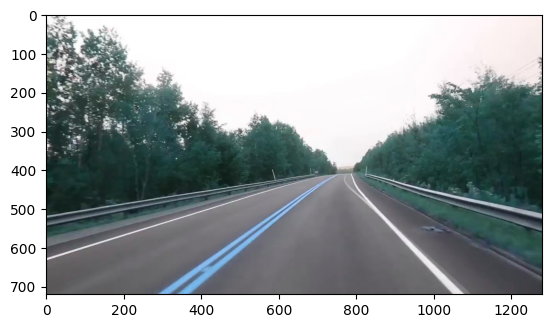

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

capture = cv2.VideoCapture('lane_detection/test1.mp4')
ret, frame = capture.read()

plt.imshow(frame)
plt.show()

In [7]:
def cannyEdg(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny_img = cv2.Canny(blur, 50, 150)
    return canny_img

In [8]:
def regionOfInterest(img):
    height = img.shape[0]
    mask = np.zeros_like(img)
    triangle = np.array([[(200, height), (1100, height), (750, 350)]], np.int32)
    cv2.fillPoly(mask, triangle, 255)
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img

In [9]:
def houghLines(img):
    hough_lines = cv2.HoughLinesP(img, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
    return hough_lines

In [10]:
def makeLines(img, lines):
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 10)
    return img

In [11]:
def makePoints(img, lineSI):
    slope, intercept = lineSI
    height = img.shape[0]
    y1 = int(height)
    x1 = int((y1-intercept)/slope)
    y2 = int(y1*3/5)
    x2 = int((y2-intercept)/slope)
    return [[x1, y1, x2, y2]]

In [12]:
def averageLines(img, lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        fit = np.polyfit((x1, x2), (y1, y2),1)
        slope = fit[0]
        intercept = fit[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    left_average = np.average(left_fit, axis=0)
    right_average = np.average(right_fit, axis=0)
    left_line = makePoints(img, left_average)
    right_line = makePoints(img, right_average)
    average_line = [left_line, right_line]
    return average_line

In [15]:
def displayLine(img, lines):
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 10)
    return img

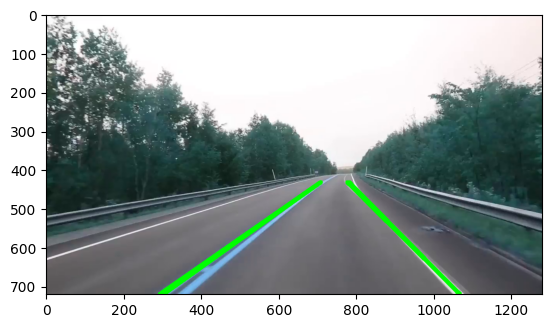

In [17]:
canny_img = cannyEdg(frame)
masked_img = regionOfInterest(canny_img)
lines = houghLines(masked_img)
average_line = averageLines(frame, lines)
lines_img = displayLine(frame, average_line)
plt.imshow(lines_img)
plt.show()